<a href="https://colab.research.google.com/github/Muhammadridho100902/google_collab/blob/main/Microsoft_Stock_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
! chmod 600 /content/kaggle.json
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d vijayvvenkitesh/microsoft-stock-time-series-analysis

  0% 0.00/26.7k [00:00<?, ?B/s]
100% 26.7k/26.7k [00:00<00:00, 54.7MB/s]


In [3]:
import zipfile
zip_file = zipfile.ZipFile('/content/microsoft-stock-time-series-analysis.zip', 'r')
zip_file.extractall('/content/')

In [4]:
df = pd.read_csv('/content/Microsoft_Stock.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [5]:
df = df[['Date', 'Close']]

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-6-b9c6864122be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [7]:
df['Date'] = df['Date'].dt.date

<ipython-input-7-e11d3234271f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].dt.date


In [8]:
df.head()

,Date,Close
0,2015-04-01,40.72
1,2015-04-02,40.29
2,2015-04-06,41.55
3,2015-04-07,41.53
4,2015-04-08,41.42


In [9]:
px.line(x=df['Date'], y=df['Close'], labels={'x':'Date', 'y':'Close'})

<Figure size 640x480 with 0 Axes>

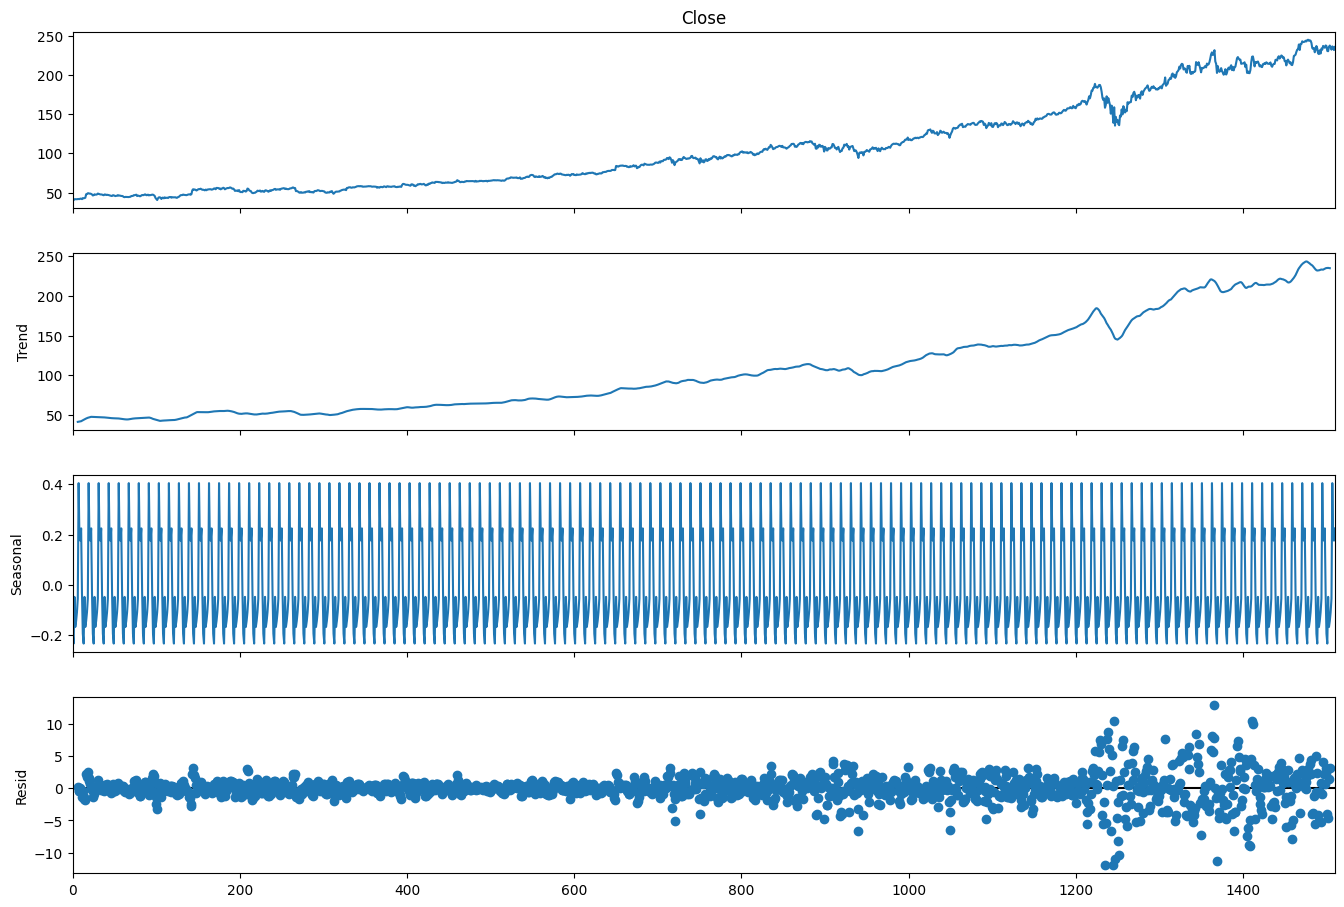

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Close"],
                            model='additive',
                            period=12)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

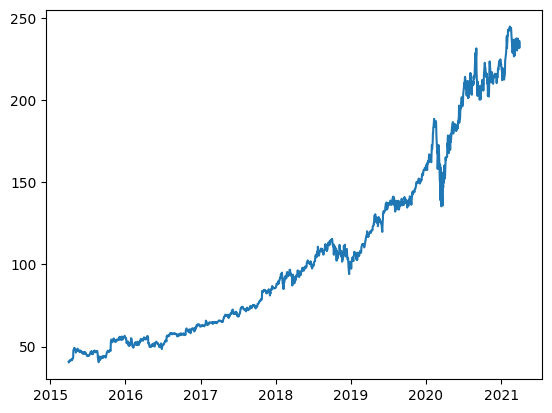

In [19]:
plt.plot(df['Date'], df.Close)
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

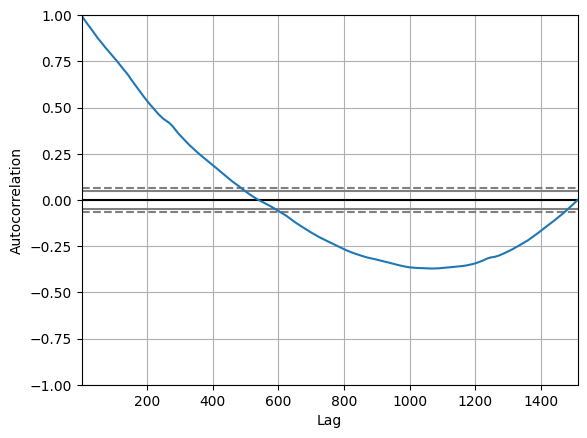

In [20]:
pd.plotting.autocorrelation_plot(df['Close'])

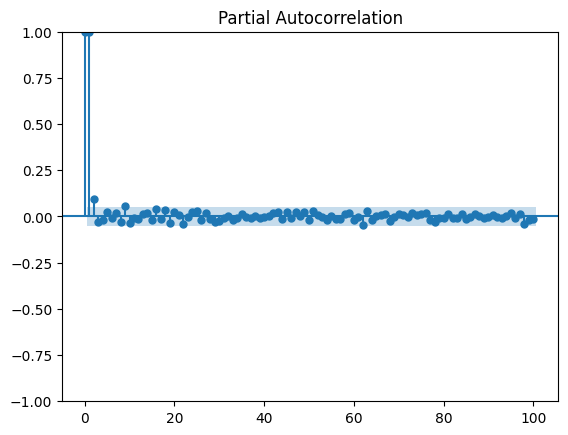

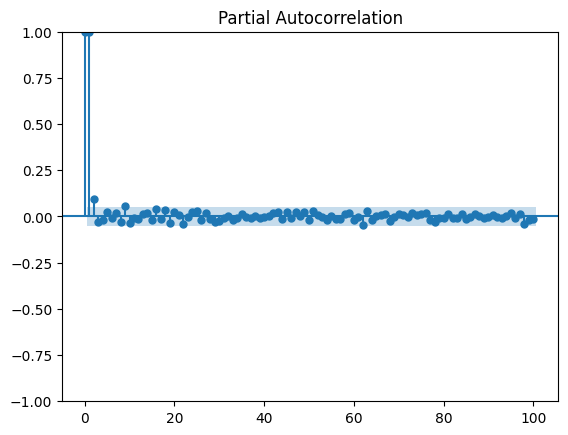

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["Close"], lags = 100)

In [22]:
import statsmodels.api as sm
import warnings

p, d, q = 5, 1, 2

model=sm.tsa.statespace.SARIMAX(df['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1511
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3360.017
Date:                            Fri, 20 Oct 2023   AIC                           6750.034
Time:                                    12:45:38   BIC                           6829.712
Sample:                                         0   HQIC                          6779.719
                                           - 1511                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9492      0.029     32.638      0.000       0.892       1.006
ar.L2         -0.5645      0.027   

In [23]:
predictions = model.predict(len(df), len(df)+10)
print(predictions)

1511    234.888149
1512    234.516459
1513    234.999811
1514    235.829251
1515    235.458000
1516    235.068312
1517    235.386026
1518    234.827538
1519    235.698927
1520    235.150495
1521    235.324406
Name: predicted_mean, dtype: float64


In [29]:
df_dummy = df.tail(200)

<Axes: >

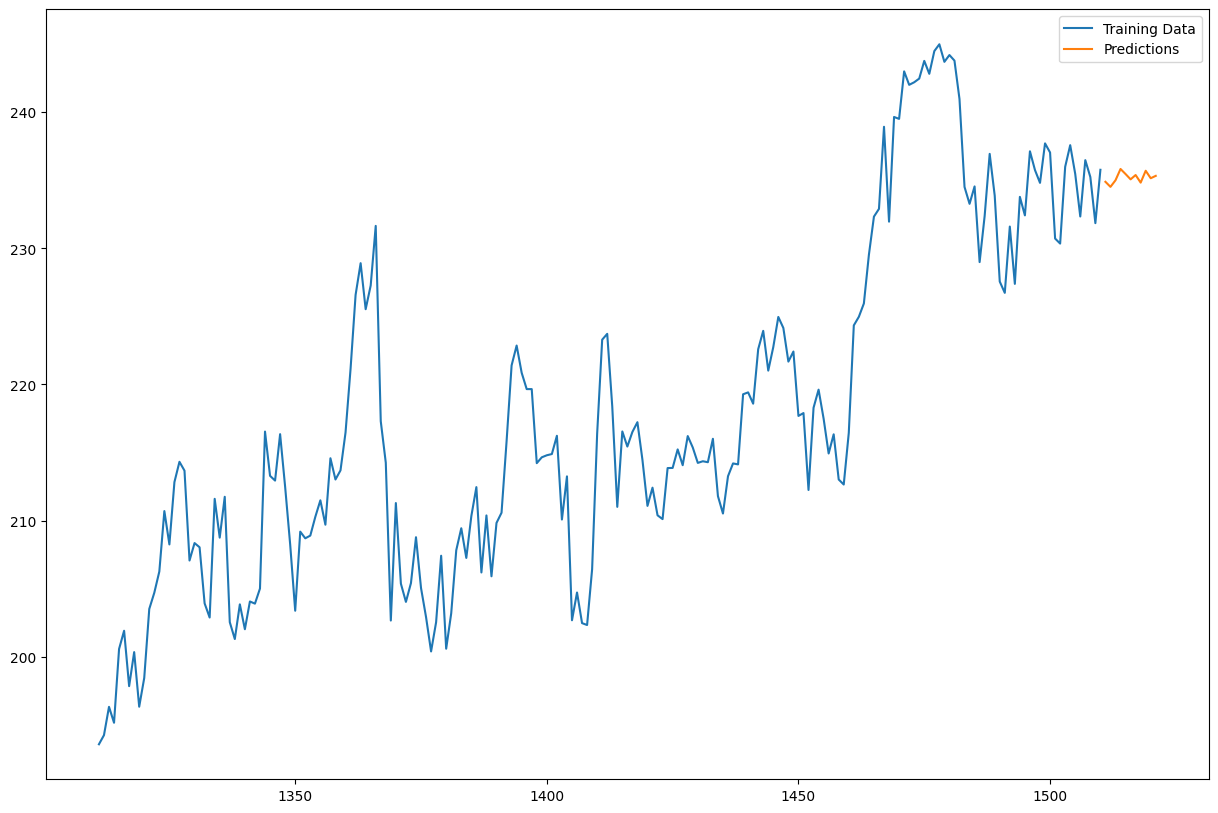

In [30]:
df_dummy["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")